In [1]:
import google.datalab.bigquery as bq
import pandas as pd

## a. Number of coins with price > $8K USD

In [2]:
%%bq query
SELECT COUNT(*) FROM `crypto_currencies.tickers` WHERE price_usd > 8000

f0_
4


## b. Total market cap of top 100 coins

In [3]:
%%bq query
SELECT SUM(market_cap_usd)/1E9 FROM (
  SELECT * FROM `crypto_currencies.tickers` ORDER BY market_cap_usd DESC LIMIT 100
) AS x

f0_
287.713305514


## c. List of coins with < $5M in available supply
Note: unit for `available_supply` is number of coins, not USD

In [4]:
%%bq query -n low_supply
SELECT * FROM `crypto_currencies.tickers`
WHERE (available_supply * price_usd) < 5000000

In [5]:
df = low_supply.execute(output_options=bq.QueryOutput.dataframe()).result()
list(df.name)

['Joulecoin',
 'Rustbits',
 'Veltor',
 'Bitpark Coin',
 'Slimcoin',
 'Bitz',
 'Abncoin',
 'RSGPcoin',
 'Torcoin',
 'GuccioneCoin',
 'Giga Watt Token',
 'DIBCOIN',
 'CCMiner',
 'Unity Ingot',
 'AntiBitcoin',
 'Flycoin',
 'Pulse',
 'Network Token',
 'Bitcoin 21',
 'PlayerCoin',
 'Bitstar',
 'FuelCoin',
 'Xonecoin',
 'Virtacoin',
 'FuckToken',
 'CryptoForecast',
 'Project Decorum',
 'Tychocoin',
 'Slevin',
 'Megacoin',
 'GoldCoin',
 'WorldCoin',
 'Bitmark',
 'BunnyCoin',
 'Sprouts',
 'Kobocoin',
 'The Cypherfunks',
 'bitSilver',
 'Cryptonite',
 'LeaCoin',
 'PayCoin',
 'Bata',
 'Magi',
 'BoostCoin',
 'bitGold',
 'IncaKoin',
 'G3N',
 'ExclusiveCoin',
 'Sativacoin',
 'Californium',
 'AmberCoin',
 'MetalCoin',
 'LiteDoge',
 'PayCon',
 'SongCoin',
 'Selfiecoin',
 'Ratecoin',
 'P7Coin',
 'Wild Beast Block',
 'TittieCoin',
 'Crypto',
 'GAIA',
 'Blitzcash',
 'Bitcoin Fast',
 'VirtualCoin',
 'Machinecoin',
 'GoldPieces',
 'BitQuark',
 'X-Coin',
 'Unrealcoin',
 'Dashcoin',
 'DigitalPrice',
 'Spread

## d. Top 5 coins with greatest percent increase in last 7 days

In [6]:
%%bq query
SELECT * FROM `crypto_currencies.tickers` ORDER BY percent_change_7d DESC LIMIT 5

_24h_volume_usd,available_supply,id,last_updated,market_cap_usd,max_supply,name,percent_change_1h,percent_change_24h,percent_change_7d,price_btc,price_usd,rank,symbol,total_supply
67465.1,780124964.0,vaperscoin,1522286347.0,356207.0,,VapersCoin,8.38,13.91,400.14,6e-08,0.000456603,832,VPRC,1635124964.0
32286200.0,39609863.0,dmarket,1522286360.0,35614020.0,,DMarket,-9.24,-31.48,175.99,0.00011304,0.89912,217,DMT,56921773.0
2572.81,401421401.0,macron,1522286350.0,757454.0,,MACRON,0.19,18.57,173.67,2.4e-07,0.00188693,784,MCRN,401421401.0
2455.31,10499996.0,cabbage,1522286346.0,219657.0,,Cabbage,-0.45,26.75,162.09,2.63e-06,0.0209197,872,CAB,10499996.0
19438.8,5885790.0,tigereum,1522286361.0,1082956.0,,Tigereum,0.5,-0.93,160.82,2.313e-05,0.183995,755,TIG,12563794.0


## e. Number of coins with "X" in ticker

In [7]:
%%bq query
SELECT COUNT(*) FROM `crypto_currencies.tickers` WHERE UPPER(symbol) LIKE "%X%"

f0_
192


## Bonus: Pareto plot of cryptocurrencies

In [8]:
%%bq query -n pareto
SELECT name, 
  ROW_NUMBER() OVER (ORDER BY market_cap_usd DESC) AS rank,
  (SUM(market_cap_usd) OVER (ORDER BY market_cap_usd DESC RANGE BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW))/1E9 AS market_cap_usd_cumulative  
FROM `crypto_currencies.tickers`
WHERE market_cap_usd IS NOT NULL
ORDER BY market_cap_usd DESC

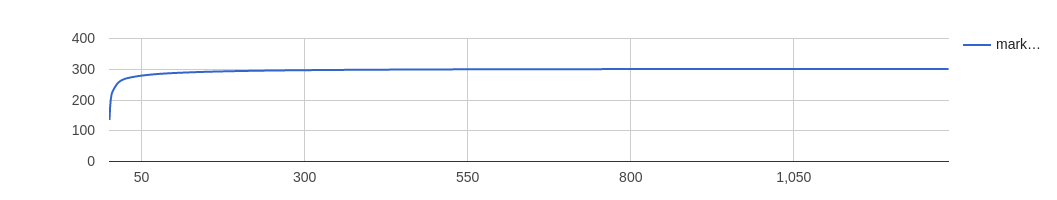

In [9]:
%%chart line --fields rank,market_cap_usd_cumulative --data pareto